In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [10]:
# Load dataset
df = pd.read_csv("Sample - Superstore.csv", encoding="ISO-8859-1")

# Basic info
print(df.head())
print(df.info())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [11]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Check missing values
print(df.isnull().sum())

# Sales statistics
print("Mean Sales:", df['sales'].mean())
print("Variance of Sales:", df['sales'].var())

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64
Mean Sales: 229.85800083049833
Variance of Sales: 388434.45530807687


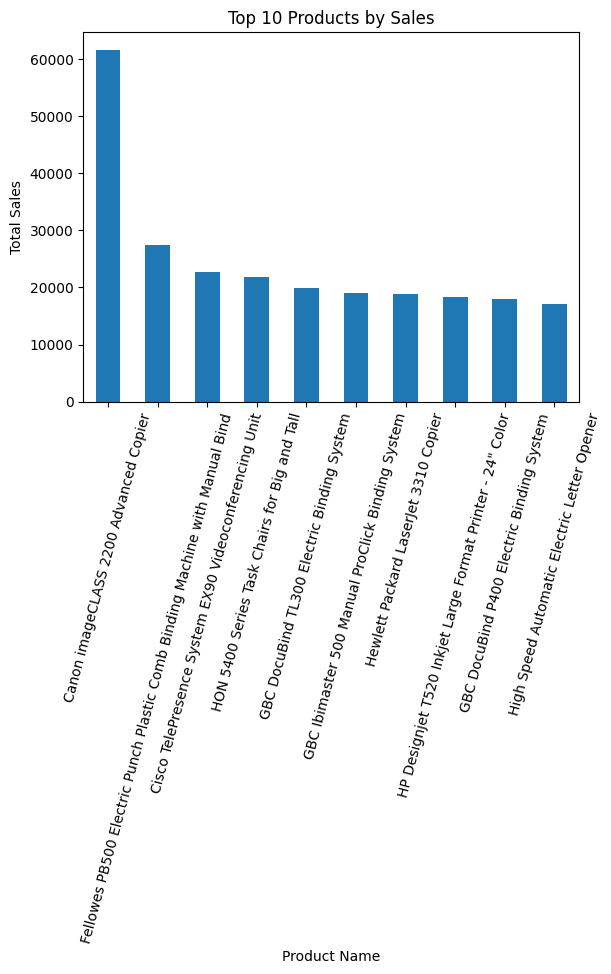

In [12]:
# Top 10 products by sales
top_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=75)
plt.show()

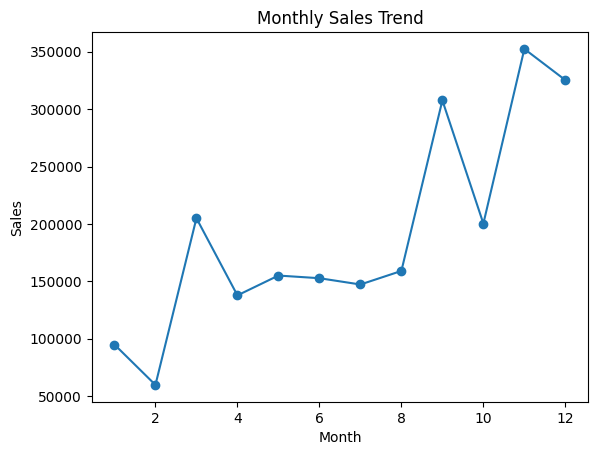

In [13]:
# Monthly sales trend
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month

monthly_sales = df.groupby('month')['sales'].sum()

plt.figure()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [14]:
# Outlier detection using IQR
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['sales'] < Q1 - 1.5 * IQR) | (df['sales'] > Q3 + 1.5 * IQR)]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 1167
